In [1]:
import matplotlib.pyplot as plt
import pdf2image
import glob
import math

In [3]:
pdfs = sorted(glob.glob('/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/*'))
pdfs

['/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Atlanta.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Billings.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Bogota.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Brasilia.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Buenos_Aires.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Cancun.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Caracas.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Charlotte.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Chicago.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/DMV.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Dallas.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped/Denver.pdf',
 '/Users/jonstar/Documents/heat_data/Figures/city_grids_cropped

In [5]:
city_str_dict = {
    'Atlanta': 'Atlanta, Georgia, USA',
    'Billings': 'Billings, Montana, USA',
    'Bogota': 'Bogota, Colombia',
    'Brasilia': 'Brasilia, Brazil',
    'Buenos_Aires': 'Buenos Aires, Argentina',
    'Cancun': 'Cancun, Mexico',
    'Caracas': 'Caracas, Venezuela',
    'Charlotte': 'Charlotte, North \nCarolina, USA',
    'Chicago': 'Chicago, Illinois, USA',
    'Dallas': 'Dallas, Texas, USA and \nFort Worth, Texas, USA',
    'Denver': 'Denver, Colorado, USA',
    'Guadalajara': 'Guadalajara, Mexico',
    'Guatemala_City': 'Guatemala City, Guatemala',
    'Havana': 'Havana, Cuba',
    'Houston': 'Houston, Texas, USA',
    'Jacksonville': 'Jacksonville, Florida, USA',
    'La_Paz': 'La Paz, Bolivia',
    'Las_Vegas': 'Las Vegas, Nevada, USA',
    'Lima': 'Lima, Peru',
    'Los_Angeles': 'Los Angeles, California, USA',
    'Managua': 'Managua, Nicaragua',
    'Manaus': 'Manaus, Brazil',
    'Mexico_City': 'Mexico City, Mexico',
    'Miami': 'Miami, Florida, USA',
    'Minneapolis': 'Minneapolis, \nMinnesota, USA',
    'Monterrey': 'Monterrey, Mexico',
    'Montevideo': 'Montevideo, Uruguay',
    'Montreal': 'Montreal, Quebec, Canada',
    'New_Orleans': 'New Orleans, \nLouisiana, USA',
    'NYC': 'New York City, \nNew York, USA',
    'Panama_City': 'Panama City, Panama',
    'Philadelphia': 'Philadelphia, \nPennsylvania, USA',
    'Phoenix': 'Phoenix, Arizona, USA',
    'Punta_Arenas': 'Punta Arenas, Chile',
    'Quito': 'Quito, Ecuador',
    'Salt_Lake_City': 'Salt Lake City, Utah, USA',
    'San_Diego': 'San Diego, California, USA \nand Tijuana, Mexico',
    'San_Francisco': 'San Francisco, California, USA \nand San Jose, California, USA',
    'San_Jose': 'San Jose, Costa Rica',
    'San_Juan': 'San Juan, Puerto Rico',
    'Santiago': 'Santiago, Chile',
    'Santo_Domingo': 'Santo Domingo, \nDominican Republic',
    'Sao_Paulo': 'Sao Paulo, Brazil',
    'Seattle': 'Seattle, Washington, USA',
    'St_Louis': 'St Louis, Missouri, USA',
    'Tegucigalpa': 'Tegucigalpa, Honduras',
    'Toronto': 'Toronto, Ontario, USA',
    'DMV': 'Washington, DC, USA and \nBaltimore, Maryland, USA'
}

In [6]:
one_Landsat_scene = ['Billings', 'Bogota', 'Brasilia', 'Buenos_Aires', 'Caracas', 'Chicago', 'DMV', 'Dallas',
                    'Guadalajara', 'Guatemala_City', 'Havana', 'Las_Vegas', 'Manaus', 'Miami', 'Monterrey', 'Montevideo',
                    'NYC', 'New_Orleans', 'Panama_City', 'Philadelphia', 'Punta_Arenas', 'Quito', 'Salt_Lake_City',
                    'San_Diego', 'San_Francisco', 'San_Jose', 'Santiago', 'Santo_Domingo', 'Sao_Paulo', 'Seattle',
                    'St_Louis', 'Tegucigalpa']
two_Landsat_scenes = ['Atlanta', 'Charlotte', 'Denver', 'Houston', 'La_Paz', 'Lima', 'Los_Angeles', 'Managua',
                     'Mexico_City', 'Minneapolis', 'Montreal', 'Phoenix', 'Toronto']
complicated = ['Cancun', 'Jacksonville', 'San_Juan']

print(len(one_Landsat_scene), len(two_Landsat_scenes), len(complicated))

32 13 3


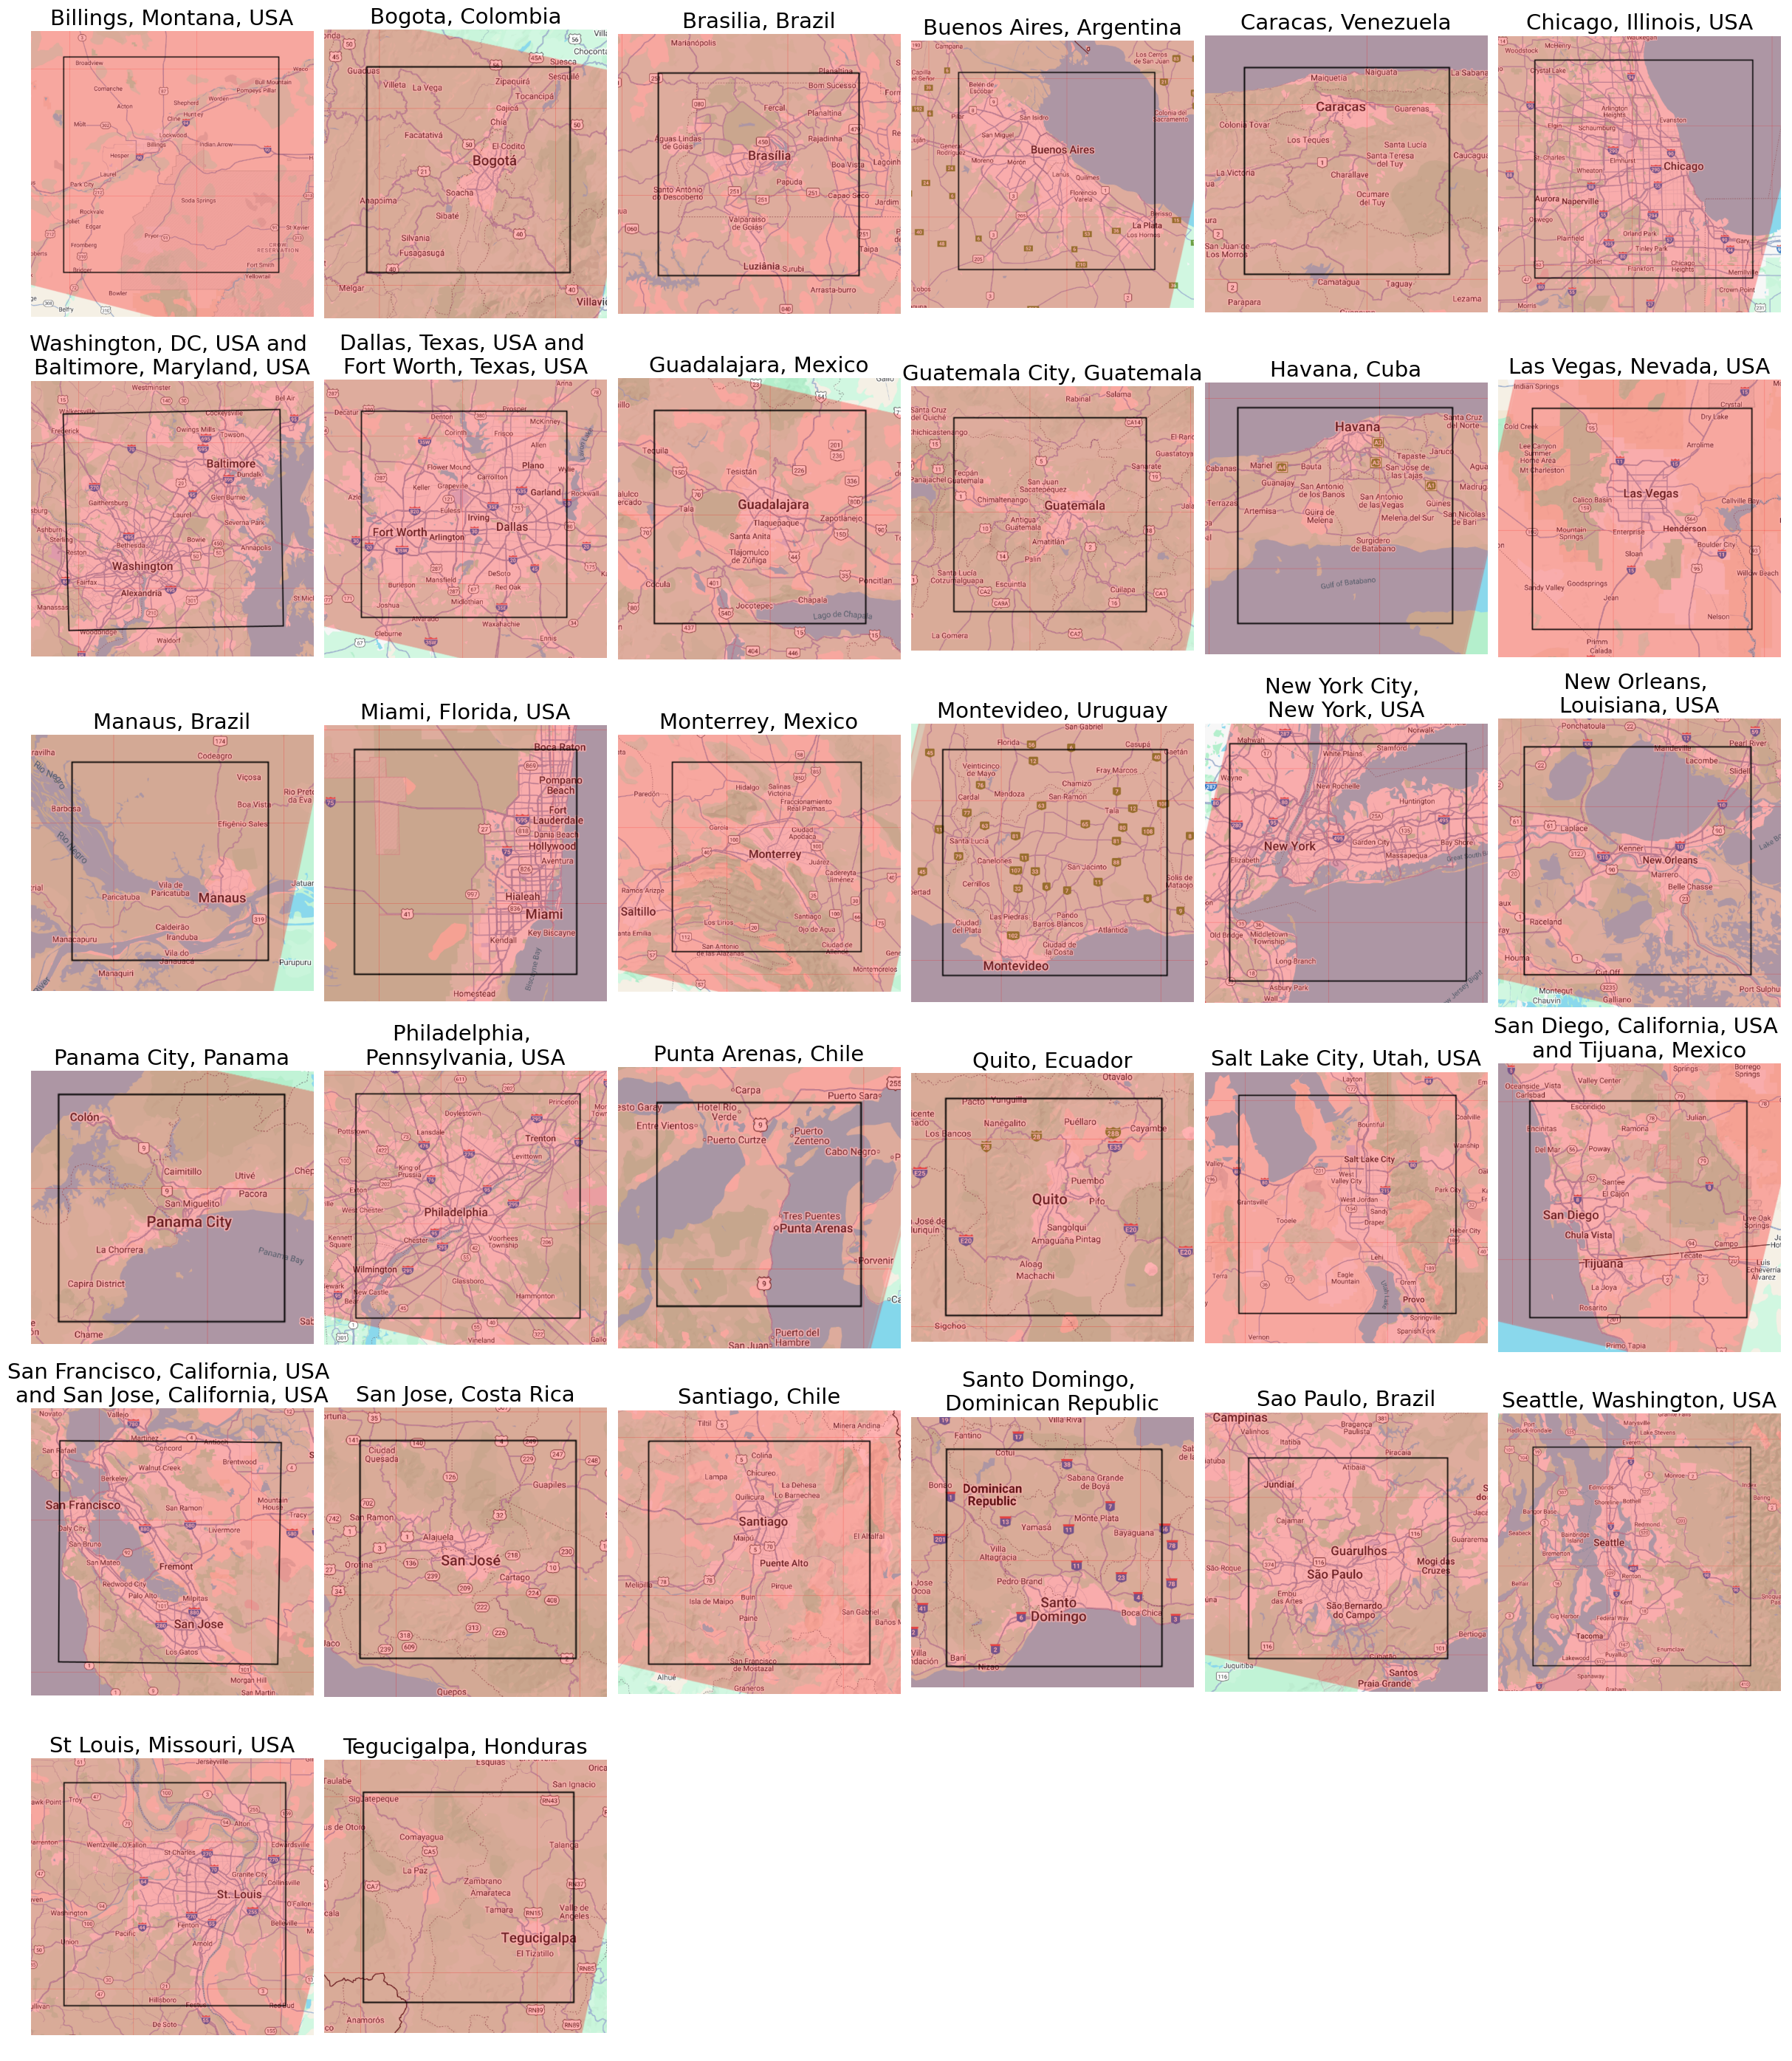

In [9]:
# Convert each PDF to an image (first page only)
one_scene_pdfs = [pdf for pdf in pdfs if pdf.split('/')[-1].split('.')[0] in one_Landsat_scene]
images = [pdf2image.convert_from_path(pdf, use_cropbox=True)[0] for pdf in one_scene_pdfs]

n = len(images)
columns = 6
rows = math.ceil(n/columns)

fig, axes = plt.subplots(rows, columns, figsize=(24, 28))
axes = axes.flatten()

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.set_title(city_str_dict[one_Landsat_scene[i]], fontsize=21)
    ax.axis("off")
    i += 1

# Hide unused axes
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
#plt.show()
plt.savefig('/Users/jonstar/Documents/heat_data/Figures/svg_figures/one_scene_Landsat_images.svg',
           transparent=True, bbox_inches='tight')

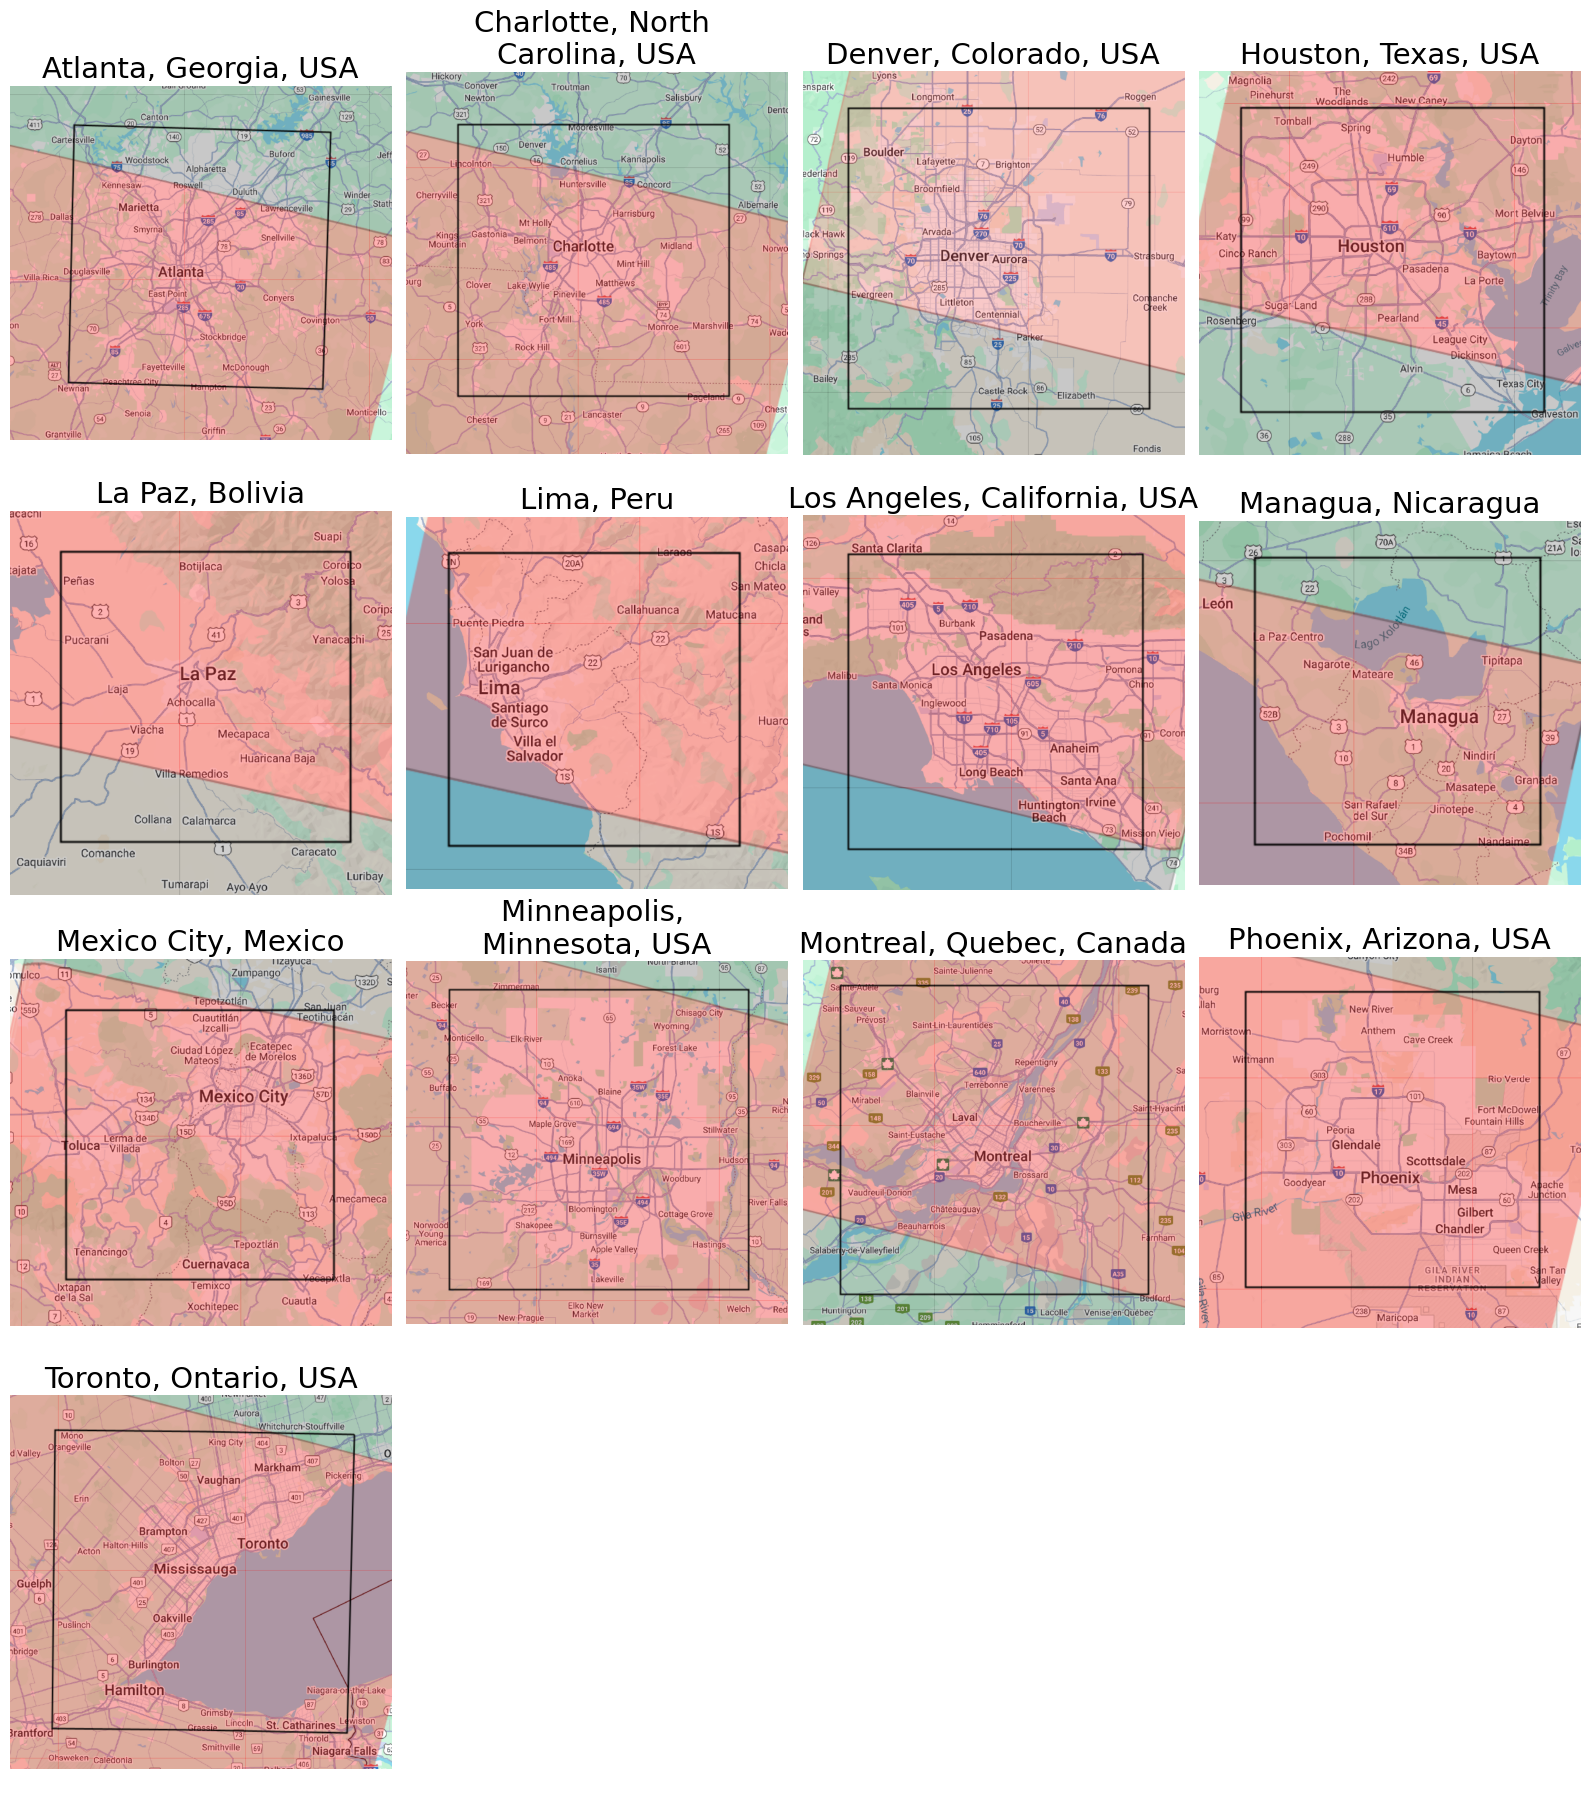

In [11]:
# Convert each PDF to an image (first page only)
two_scene_pdfs = [pdf for pdf in pdfs if pdf.split('/')[-1].split('.')[0] in two_Landsat_scenes]
images = [pdf2image.convert_from_path(pdf, use_cropbox=True)[0] for pdf in two_scene_pdfs]

n = len(images)
columns = 4
rows = math.ceil(n/columns)

fig, axes = plt.subplots(rows, columns, figsize=(16, 18))
axes = axes.flatten()

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.set_title(city_str_dict[two_Landsat_scenes[i]], fontsize=21)
    ax.axis("off")
    i += 1

# Hide unused axes
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
#plt.show()
plt.savefig('/Users/jonstar/Documents/heat_data/Figures/svg_figures/two_scene_Landsat_images.svg',
           transparent=True, bbox_inches='tight')

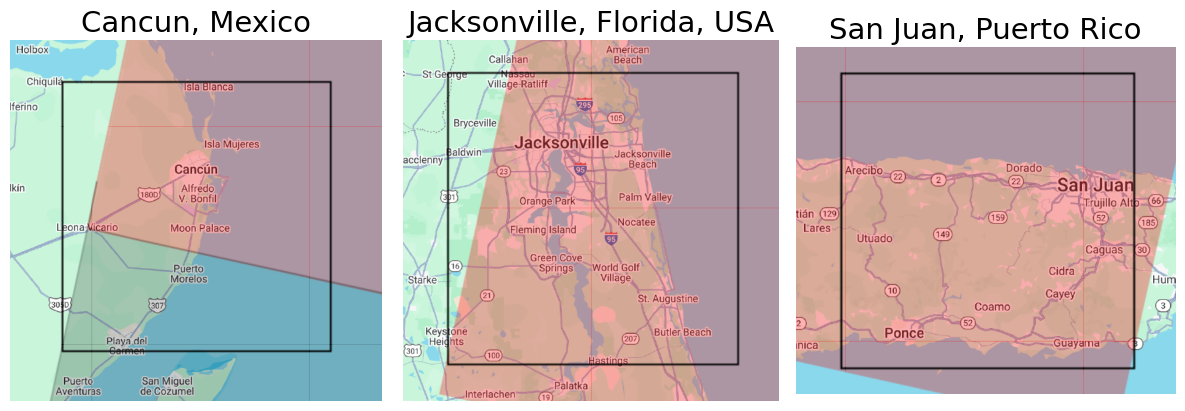

In [12]:
# Convert each PDF to an image (first page only)
complicated_pdfs = [pdf for pdf in pdfs if pdf.split('/')[-1].split('.')[0] in complicated]
images = [pdf2image.convert_from_path(pdf, use_cropbox=True)[0] for pdf in complicated_pdfs]

n = len(images)
columns = 3
rows = math.ceil(n/columns)

fig, axes = plt.subplots(rows, columns, figsize=(12, 4))
axes = axes.flatten()

i = 0
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.set_title(city_str_dict[complicated[i]], fontsize=21)
    ax.axis("off")
    i += 1

# Hide unused axes
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
#plt.show()
plt.savefig('/Users/jonstar/Documents/heat_data/Figures/svg_figures/complicated_Landsat_images.svg',
           transparent=True, bbox_inches='tight')